In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('apple_daily_data.csv')

In [3]:
df

,timestamp,open,high,low,close,volume
0,2025-02-06,231.285,233.80,230.425,233.22,29925349
1,2025-02-05,228.530,232.67,228.270,232.47,39664989
2,2025-02-04,227.250,233.13,226.650,232.80,45067301
3,2025-02-03,229.990,231.83,225.700,228.01,73063301
4,2025-01-31,247.190,247.19,233.440,236.00,101075128
...,...,...,...,...,...,...
6351,1999-11-05,84.620,88.37,84.000,88.31,3721500
6352,1999-11-04,82.060,85.37,80.620,83.62,3384700
6353,1999-11-03,81.620,83.25,81.000,81.50,2932700
6354,1999-11-02,78.000,81.69,77.310,80.25,3564600


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
df.set_index('timestamp', inplace = True)

In [6]:
df

,open,high,low,close,volume
timestamp,,,,,
2025-02-06,231.285,233.80,230.425,233.22,29925349
2025-02-05,228.530,232.67,228.270,232.47,39664989
2025-02-04,227.250,233.13,226.650,232.80,45067301
2025-02-03,229.990,231.83,225.700,228.01,73063301
2025-01-31,247.190,247.19,233.440,236.00,101075128
...,...,...,...,...,...
1999-11-05,84.620,88.37,84.000,88.31,3721500
1999-11-04,82.060,85.37,80.620,83.62,3384700
1999-11-03,81.620,83.25,81.000,81.50,2932700


In [7]:
ts = pd.Series(df['close'], name="TimeSeries")

In [8]:
ts = ts.sort_index()

In [9]:
print(ts.index.inferred_freq)

None


In [10]:
ts

timestamp
1999-11-01     77.62
1999-11-02     80.25
1999-11-03     81.50
1999-11-04     83.62
1999-11-05     88.31
               ...  
2025-01-31    236.00
2025-02-03    228.01
2025-02-04    232.80
2025-02-05    232.47
2025-02-06    233.22
Name: TimeSeries, Length: 6356, dtype: float64

In [11]:
len(ts)

6356

In [12]:
print("Series min:", ts.min(), "max:", ts.max(), "mean:", ts.mean())

Series min: 13.12 max: 702.1 mean: 174.95636853366898


In [13]:
print(ts.index[:10])

DatetimeIndex(['1999-11-01', '1999-11-02', '1999-11-03', '1999-11-04',
               '1999-11-05', '1999-11-08', '1999-11-09', '1999-11-10',
               '1999-11-11', '1999-11-12'],
              dtype='datetime64[ns]', name='timestamp', freq=None)


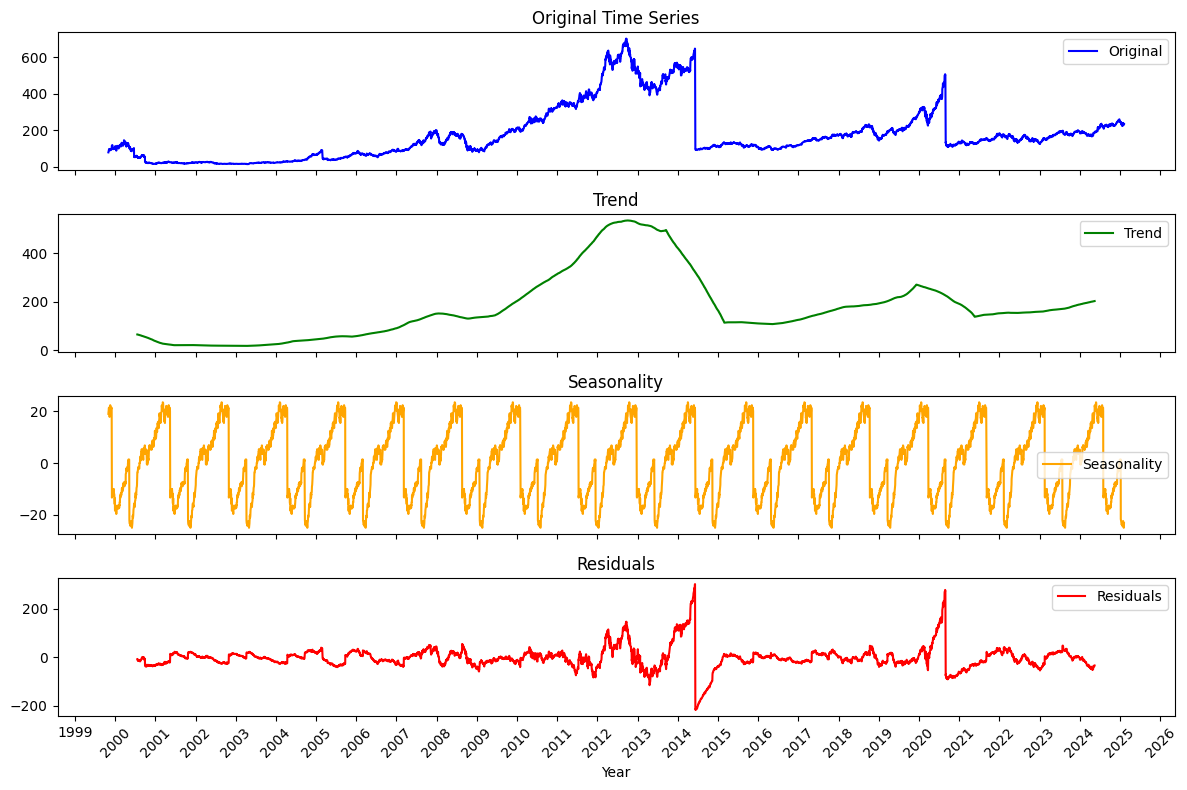

In [14]:
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, model='additive', period=365)  

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

axes[3].xaxis.set_major_locator(mdates.YearLocator())  
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  

plt.xticks(rotation=45)

axes[0].plot(ts.index, ts, label='Original', color='blue')
axes[0].set_title('Original Time Series')
axes[0].legend()

axes[1].plot(ts.index, decomposition.trend, label='Trend', color='green')
axes[1].set_title('Trend')
axes[1].legend()

axes[2].plot(ts.index, decomposition.seasonal, label='Seasonality', color='orange')
axes[2].set_title('Seasonality')
axes[2].legend()

axes[3].plot(ts.index, decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residuals')
axes[3].legend()

plt.xlabel('Year')
plt.tight_layout()
plt.show()


In [15]:
#Null Hypothesis (H₀): The time series is non-stationary (it has some trend or systematic pattern).
#Alternative Hypothesis (H₁): The time series is stationary 

#p-value ≤ 0.05: Reject H₀ → The series is stationary.
#p-value > 0.05: Fail to reject H₀ → The series is non-stationary.

from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF Test Results:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    
    if result[1] <= 0.05:
        print("The time series is stationary (Reject H₀).")
    else:
        print("The time series is non-stationary (Fail to reject H₀).")

adf_test(ts)


ADF Test Results:
Test Statistic: -2.5892715733740204
p-value: 0.09523495012513494
Critical Values: {'1%': -3.431379416735103, '5%': -2.8619949122326487, '10%': -2.5670121466584046}
The time series is non-stationary (Fail to reject H₀).


In [16]:
#Null Hypothesis H0: the series is trend-stationary (stationary around a deterministic trend).
#Alternative Hypothesis 𝐻𝐴 :The series is non-stationary

#If the p-value is large (> 0.05), fail to reject H0 → The series is stationary.
#If the p-value is small (< 0.05), reject H0 The series is non-stationary.

from statsmodels.tsa.stattools import kpss

def kpss_test(series):
    statistic, p_value, n_lags, critical_values = kpss(series, regression='ct')  # 'c' for constant, 'ct' for trend
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Critical Values: {critical_values}')

    if p_value < 0.05:
        print("Reject the null hypothesis - The time series is non-stationary.")
    else:
        print("Fail to reject the null hypothesis - The time series is stationary.")

kpss_test(ts)

KPSS Statistic: 1.3566202201629924
p-value: 0.01
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Reject the null hypothesis - The time series is non-stationary.


C:\Users\hppro\anaconda3\envs\arfima\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


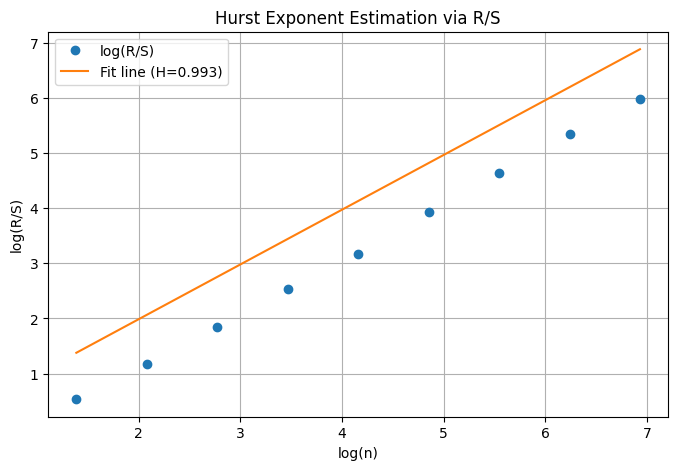

Hurst Exponent: 0.9932


In [32]:
def hurst_exponent_rs(time_series, min_window=4, max_window=None, plot=False):
    ts = np.array(time_series)
    N = len(ts)

    if max_window is None:
        max_window = N // 5 

    min_exp = int(np.log2(min_window))
    max_exp = int(np.log2(max_window))
    window_sizes = [2 ** k for k in range(min_exp, max_exp + 1)]

    rs_values = []

    for window in window_sizes:
        n_segments = N // window
        rs = []

        for i in range(n_segments):
            segment = ts[i * window:(i + 1) * window]
            mean = np.mean(segment)
            dev = segment - mean
            cum_dev = np.cumsum(dev)
            R = np.max(cum_dev) - np.min(cum_dev)
            S = np.std(segment)
            if S != 0:
                rs.append(R / S)

        if len(rs) > 0:
            rs_values.append(np.mean(rs))

    log_rs = np.log(rs_values)
    log_windows = np.log(window_sizes)

    hurst, _ = np.polyfit(log_windows, log_rs, 1)

    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(log_windows, log_rs, 'o', label='log(R/S)')
        plt.plot(log_windows, hurst * np.array(log_windows), label=f'Fit line (H={hurst:.3f})')
        plt.xlabel('log(n)')
        plt.ylabel('log(R/S)')
        plt.title('Hurst Exponent Estimation via R/S')
        plt.legend()
        plt.grid(True)
        plt.show()

    return hurst

hurst = hurst_exponent_rs(ts, plot=True)
print(f"Hurst Exponent: {hurst:.4f}")


In [19]:
def hurst_exponent_dfa(series, min_window=10, max_window=None, step=10, plot=False):
    ts = np.array(series)
    N = len(ts)
    if max_window is None:
        max_window = N // 4  
    Y = np.cumsum(ts - np.mean(ts))

    flucts = []
    window_sizes = range(min_window, max_window, step)

    for win_size in window_sizes:
        n_segments = N // win_size
        local_flucts = []

        for i in range(n_segments):
            segment = Y[i * win_size:(i + 1) * win_size]
            if len(segment) < win_size:
                continue
            x = np.arange(win_size)
            p = np.polyfit(x, segment, 1)
            trend = np.polyval(p, x)
            detrended = segment - trend
            local_flucts.append(np.sqrt(np.mean(detrended ** 2)))

        if local_flucts:
            flucts.append(np.mean(local_flucts))

    log_flucts = np.log(flucts)
    log_windows = np.log(list(window_sizes[:len(flucts)]))
    hurst_dfa, _ = np.polyfit(log_windows, log_flucts, 1)

    return hurst_dfa
hurst1 = hurst_exponent_dfa(ts, plot=True)
print(f"Hurst Exponent: {hurst:.4f}")

Hurst Exponent: 0.9977
